# Demo về stochastic gradient descent

In [27]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = np.random.randn(500, 2)

In [29]:
data[0]

array([-0.84573752,  0.13326312])

In [30]:
data[0, 0]

-0.8457375159737659

In [31]:
data[0, 1]

0.133263119129506

In [32]:
theta = np.zeros(2)

In [33]:
theta

array([0., 0.])

In [34]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = m*x + b
        loss = loss + (y - y_hat)**2
        
    mse = loss / float(len(data))
    return mse

In [35]:
loss_function(data, theta)

0.9830698156297769

In [36]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # gradient theo m
        gradients[1] += -(2/N) * (y - (theta[0]*x + b)) # gradient theo b
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon) # cộng thêm một epsilon để tránh lỗi chia cho 0
    
    return gradients

In [37]:
compute_gradients(data, theta)

array([ 0.00012225, -0.00022558])

In [38]:
def minibatch(data, theta, lr=1e-2, minibatch_ratio=0.01, num_iterations=2000):
    minibatch_size = int(math.ceil(len(data)) * minibatch_ratio)
    loss = []
    
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size) 
        np.random.shuffle(data)
        
        sample_data = data[:sample_size[0], :]
        grad = compute_gradients(sample_data, theta)
        theta = theta - (lr * grad)
        loss.append(loss_function(data, theta))
        
    return theta, loss

[0.00411177 0.06181532]


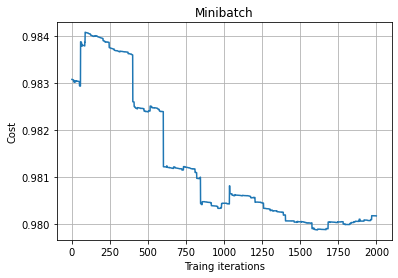

In [39]:
theta, loss = minibatch(data, theta)

print(theta)

plt.plot(loss)
plt.grid()
plt.xlabel('Traing iterations')
plt.ylabel('Cost')
plt.title('Minibatch')
plt.show()